In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Part (a) Data Simulation

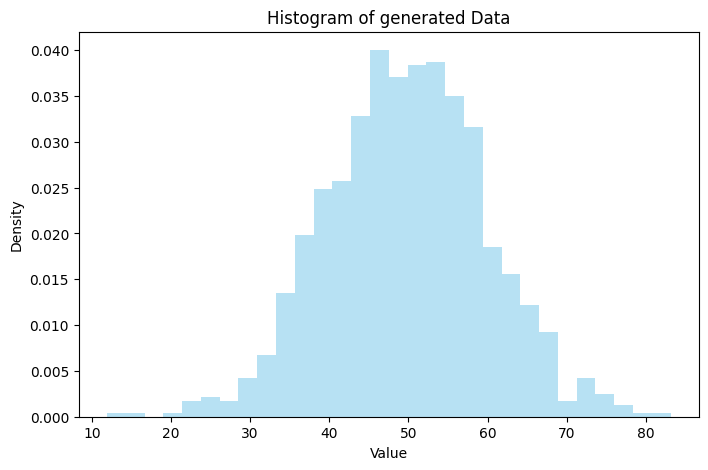

In [29]:
# 1. Generate data from a Normal(50, 10)
np.random.seed(50)
mu = 50
sigma = 10
N = 1000
data = np.random.normal(mu, sigma, N)

# 2. Plot the histogram of the data
plt.figure(figsize=(8, 5))
plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')
plt.title('Histogram of generated Data')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Part (b) Normal Distribution Fitting

MLE Estimated mean = 49.76
MLE Estimated std  = 10.04


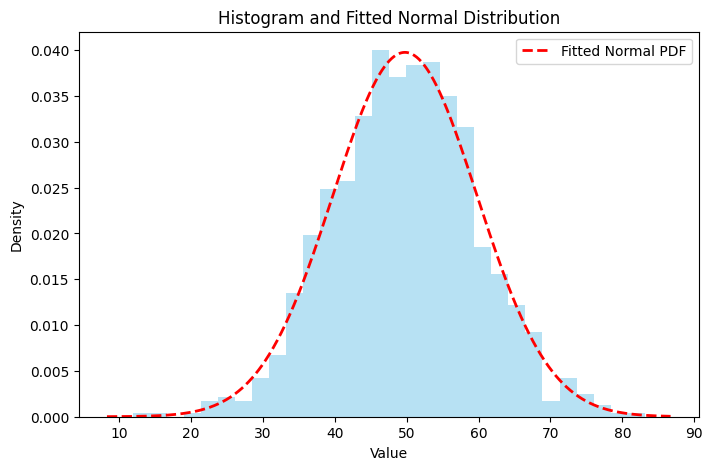

In [30]:
# 1. Fit a normal distribution using MLE (scipy's norm.fit)
mu_hat, sigma_hat = norm.fit(data)

# Print estimated parameters and plot histogram
print(f"MLE Estimated mean = {mu_hat:.2f}")
print(f"MLE Estimated std  = {sigma_hat:.2f}")
plt.figure(figsize=(8, 5))
count, bins, _ = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue')

# Generate x values for the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf_fitted = norm.pdf(x, loc=mu_hat, scale=sigma_hat)

# 2. Overlay the PDF
plt.plot(x, pdf_fitted, 'r--', linewidth=2, label='Fitted Normal PDF')
plt.title('Histogram and Fitted Normal Distribution')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Part (c) Handling Outliers

In [31]:
# 1.  generating outliers between 100 and 150
outliers = np.random.uniform(100, 150, 50)
dataset_outliers = np.concatenate([data, outliers])

In [38]:
# 2. Normal distribution MLE with the data that has outliers
mu_hat_outliers, sigma_hat_outliers = norm.fit(dataset_outliers)
print(f"With outliers added:")
print(f"MLE Estimated mean = {mu_hat_outliers:.2f}")
print(f"MLE Estimated std  = {sigma_hat_outliers:.2f}")


With outliers added:
MLE Estimated mean = 53.32
MLE Estimated std  = 18.87


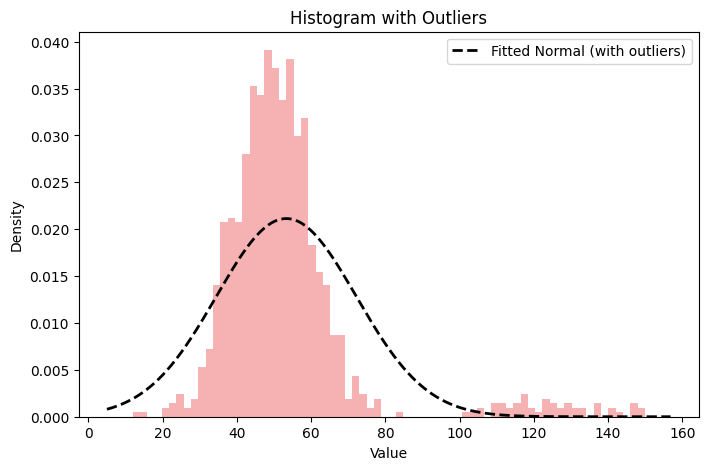

In [39]:
plt.figure(figsize=(8, 5))
plt.hist(dataset_outliers, bins=70, density=True, alpha=0.6, color='lightcoral')

# PDF for data with outliers
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 1000)
pdf_outliers = norm.pdf(x, loc=mu_hat_outliers, scale=sigma_hat_outliers)

plt.plot(x, pdf_outliers, 'k--', linewidth=2, label='Fitted Normal (with outliers)')
plt.title('Histogram with Outliers')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


# Affect of Outliers

We can see that without the outliers, Our estimated mean and standard deviation are close to the true value (Which is what we would hope). 

MLE Estimated mean = 49.76

MLE Estimated std  = 10.04

When we introduce outliers into the data set we get the following values:

MLE Estimated mean = 53.32

MLE Estimated std  = 18.87

This is a lot different than when we calculated without the outliers, the mean and standard deviation have both increased in value. We expected this to happen as our outliers are between the range of 100-150. THis would shift our mean and std to increase. If out dataset contains such outliers, we expect such a thing to occur.

We can detect such outliers by:

Using the Z-score rule.

Using the Z-score formula, where x is the sample mean, and sigma is the sample std deviation. z_i would let us know how many std deviations away from the mean a data point is. If the z_i is largew then that means the data point is really far away from the mean as compared to the rest of the data. Therefore according to the 3 sigma rule, any z_i with more than or less than 3 are typically flagged as a  potential outlier.

